#Acidentes de trânsito em São Paulo entre 2015 à 2023.

## Introdução
São Paulo, uma das maiores metrópoles do mundo, enfrenta desafios significativos em termos de mobilidade urbana. Com uma população em constante crescimento e uma infraestrutura nem sempre adequada, a cidade se depara com uma série de problemas relacionados ao trânsito, resultando em acidentes fatais que impactam diretamente a vida dos cidadãos. Nesse contexto, a análise de dados se torna uma ferramenta crucial para compreender e enfrentar esses desafios.

## Objetivo
Este estudo tem como objetivo explorar os dados dos acidentes fatais ocorridos em São Paulo entre 2015 e 2023, buscando identificar padrões que possam ser utilizados para melhorar a segurança viária na cidade. Os dados utilizados são de domínio público e estão disponíveis no seguinte link: [painelderesultados.infosiga.sp.gov.br/bases/obitos_publico.csv.](https://).

## Nota do autor

Os dados tratam de pessoas reais, não se limitando apenas a números e estatísticas. Cada registro representa uma vida perdida e impacta diretamente não apenas a vítima, mas também suas famílias e a comunidade como um todo. Manifesto aqui meu solene respeito a todas as vítimas e suas famílias, reconhecendo a importância de abordar esse tema com empatia.

## Carregando dados.

In [ ]:
# Carregando todas as bibliotecas necessárias para esta análise. Deixo também um teste de versão.
import pandas as pd #Versão do Pandas: 1.5.3
import numpy as np  # Versão do NumPy: 1.25.2
import matplotlib.pyplot as plt
import seaborn as sns  # Versão do Seaborn: 0.13.1
import geopandas as gpd
import ipywidgets as widgets
from ipywidgets import interact

# Teste de versão das bibliotecas
#print("Versão do Pandas:", pd.__version__)
#print("Versão do NumPy:", np.__version__)
#print("Versão do Seaborn:", sns.__version__)


In [ ]:
# Carregando o banco de dados, certifique de alterar o path conforme sua necessidade.
path = "/content/obitos_publico.csv"

# Criando o dataframe
df = pd.read_csv(path, sep=';', encoding='latin1')

# Configuração para exibir todas as colunas no display (opcional)
pd.set_option('display.max_columns', None)

# Exibindo os primeiros objetos
df.head(3)

,Id da Delegacia (RDO),Número do Bo (RDO),Ano do BO (RDO),Data do Óbito,Data do Acidente,Tipo de via,Dia do óbito,Mês do Óbito,Mês Óbito Descrição,Ano do Óbito,Ano/Mês do Óbito,Dia da Semana,Hora do Acidente,Turno,Município,Região Administrativa,Logradouro,Númeral / KM,Jurisdição,Administração,Conservação,Tipo do local da ocorrência,LAT_(GEO),LONG_(GEO),Tipo do veículo da vítima,Tipo de vítima,Local do óbito,Tipo de acidente,Sub Tipo do Acidente,Sexo,Faixa etária,Idade da vítima,Outro Veículo Envolvido,Tempo entre o Acidente e o Óbito
0,70527,1009279379,2024,2024-02-29,2024-02-22,Rodovias,29,2,FEVEREIRO,2024,2024.02,QUINTA,10:58:00,MANHA,PIRACICABA,Campinas,SP 304,"168,0",ESTADUAL,DER,DR13 - Rio Claro,PUBLICO,"-22,6841825589781","-47,6826775562607",MOTOCICLETA,NAO DISPONIVEL,ESTABELECIMENTO DE SAUDE,CHOQUE,VEÍCULO ESTACIONADO,MASCULINO,55-59,59,NAO DISPONIVEL,Até 30 dias
1,70112,1009286543,2024,2024-02-29,2024-02-29,Rodovias,29,2,FEVEREIRO,2024,2024.02,QUINTA,20:00:00,NOITE,AMPARO,Campinas,SP 095,"47,9",ESTADUAL,DER,DR01 - Campinas,PUBLICO,"-22,7097766158937","-46,8336695147569",BICICLETA,CONDUTOR,ESTABELECIMENTO DE SAUDE,COLISAO,FRONTAL,MASCULINO,45-49,48,AUTOMOVEL,Até 30 dias
2,40301,1009286771,2024,2024-02-29,2024-02-29,Rodovias,29,2,FEVEREIRO,2024,2024.02,QUINTA,21:10:00,NOITE,SAO JOSE DOS CAMPOS,São José dos Campos,SP 099,"6,2",ESTADUAL,CONCESSIONÁRIA-ARTESP,ECOPISTAS,PUBLICO,"-23,2503590384419","-45,8519445884388",MOTOCICLETA,CONDUTOR,ESTABELECIMENTO DE SAUDE,COLISAO,FRONTAL,MASCULINO,18-24,23,AUTOMOVEL,Até 30 dias


## Preparando e transformando os dados.

In [ ]:
# Exibindo quantidade de registro por ano.
df['Ano do BO (RDO)'].value_counts()

Ano do BO (RDO)
2015    6481
2016    5951
2023    5645
2022    5636
2017    5633
2018    5476
2019    5425
2020    4994
2021    4951
2024     861
2014      27
2013       8
2012       4
2011       1
Name: count, dtype: int64

In [ ]:
# Excluir todas as instâncias com anos inferiores a 2015 e maiores que 2023
df.drop(df[(df['Ano do BO (RDO)'] < 2015) | (df['Ano do BO (RDO)'] > 2023)].index, inplace=True)

# Verificar a contagem de valores da coluna 'Ano do BO (RDO)'
df['Ano do BO (RDO)'].value_counts()


Ano do BO (RDO)
2015    6481
2016    5951
2023    5645
2022    5636
2017    5633
2018    5476
2019    5425
2020    4994
2021    4951
Name: count, dtype: int64

In [ ]:
# Em princípio podemos eliminar dados redundantes. Podem ser obtidos de outras variáveis.
colunas_excluidas = ['Dia do óbito', 'Mês do Óbito', 'Mês Óbito Descrição', 'Ano do Óbito', 'Ano/Mês do Óbito','Faixa etária','Id da Delegacia (RDO)']
df = df.drop(columns=colunas_excluidas)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50192 entries, 28 to 51092
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Número do Bo (RDO)                50192 non-null  int64 
 1   Ano do BO (RDO)                   50192 non-null  int64 
 2   Data do Óbito                     50192 non-null  object
 3   Data do Acidente                  50192 non-null  object
 4   Tipo de via                       50192 non-null  object
 5   Dia da Semana                     50192 non-null  object
 6   Hora do Acidente                  50192 non-null  object
 7   Turno                             50192 non-null  object
 8   Município                         50192 non-null  object
 9   Região Administrativa             50192 non-null  object
 10  Logradouro                        50192 non-null  object
 11  Númeral / KM                      50192 non-null  object
 12  Jurisdição            

In [ ]:
# Convertendo colunas de datas para datetime
df['Data do Óbito'] = pd.to_datetime(df['Data do Óbito'])
df['Data do Acidente'] = pd.to_datetime(df['Data do Acidente'])

In [ ]:
# Convertendo para string e dividindo pela hora
df['Hora do Acidente'] = df['Hora do Acidente'].astype(str).apply(lambda x: x.split(':')[0])

# Substituindo 'NAO DISPONIVEL' por NaN
df['Hora do Acidente'] = df['Hora do Acidente'].replace('NAO DISPONIVEL', pd.NA)

# Convertendo para float
df['Hora do Acidente'] = pd.to_numeric(df['Hora do Acidente'], errors='coerce')


In [ ]:
# Substituir vírgula por ponto e converter para float, com tratamento de erros
df['LONG_(GEO)'] = pd.to_numeric(df['LONG_(GEO)'].str.replace(',', '.'), errors='coerce')
df['LAT_(GEO)'] = pd.to_numeric(df['LAT_(GEO)'].str.replace(',', '.'), errors='coerce')


In [ ]:
# Substituir 'NAO DISPONIVEL' por 0
df['Idade da vítima'].replace('NAO DISPONIVEL', 0, inplace=True)

# Substituir NaN por 0 na coluna 'Idade da vítima'
df['Idade da vítima'].fillna(0, inplace=True)

# Convertendo coluna para inteiros
df['Idade da vítima'] = df['Idade da vítima'].astype(int)

# Remover as linhas onde a idade da vítima é igual a 0
df = df[df['Idade da vítima'] != 0]


In [ ]:
# Exibindo informações atualizadas do DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 47388 entries, 28 to 51092
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Número do Bo (RDO)                47388 non-null  int64         
 1   Ano do BO (RDO)                   47388 non-null  int64         
 2   Data do Óbito                     47388 non-null  datetime64[ns]
 3   Data do Acidente                  47388 non-null  datetime64[ns]
 4   Tipo de via                       47388 non-null  object        
 5   Dia da Semana                     47388 non-null  object        
 6   Hora do Acidente                  43782 non-null  float64       
 7   Turno                             47388 non-null  object        
 8   Município                         47388 non-null  object        
 9   Região Administrativa             47388 non-null  object        
 10  Logradouro                        47388 non-null  

In [ ]:
# Print das variáveis para investigação.
print('=================================================')
print("Tipos de via:")
print(df['Tipo de via'].value_counts())
print('=================================================')
print("tipos de turno:")
print(df['Turno'].value_counts())
print('=================================================')
print("Tipo do veículo da vítima:")
print(df['Tipo do veículo da vítima'].value_counts())
print('=================================================')
print('Outro Veículo Envolvido:')
print(df['Outro Veículo Envolvido'].value_counts())
print('=================================================')
print("Tipo de vítima:")
print(df['Tipo de vítima'].value_counts())
print('=================================================')
print("Tipo de acidente:")
print(df['Tipo de acidente'].value_counts())
print('=================================================')
print("Sexo:")
print(df['Sexo'].value_counts())
print('=================================================')
print("Idade da vítima:")
print(df['Idade da vítima'].value_counts())
print('=================================================')
print('Sub Tipo do Acidente:')
print(df['Sub Tipo do Acidente'].value_counts())
print('=================================================')


Tipos de via:
Tipo de via
Vias Municipais    24966
Rodovias           19984
NAO DISPONIVEL      2438
Name: count, dtype: int64
tipos de turno:
Turno
NOITE             15846
TARDE             10396
MADRUGADA          8959
MANHA              8581
NAO DISPONIVEL     3606
Name: count, dtype: int64
Tipo do veículo da vítima:
Tipo do veículo da vítima
MOTOCICLETA       17537
AUTOMOVEL         11821
PEDESTRE          10820
BICICLETA          3113
NAO DISPONIVEL     1865
CAMINHAO           1605
ONIBUS              382
OUTROS              245
Name: count, dtype: int64
Outro Veículo Envolvido:
Outro Veículo Envolvido
AUTOMOVEL         11972
NÃO HÁ             8810
CAMINHAO           5744
NAO DISPONIVEL     4777
MOTOCICLETA        2781
ONIBUS             2086
OUTROS              226
BICICLETA           145
PEDESTRE             63
Name: count, dtype: int64
Tipo de vítima:
Tipo de vítima
CONDUTOR          27896
PEDESTRE          10835
PASSAGEIRO         5649
NAO DISPONIVEL     3008
Name: count, dty

In [ ]:
# Remoção de valores  para o tipo de via.
romove_vias = df.loc[(df['Tipo de via'] == 'NAO DISPONIVEL')]
df = df.drop(romove_vias.index)

# Remoção de valores para o turno.
remove_turno = df.loc[(df['Turno'] == 'NAO DISPONIVEL')]
df = df.drop(remove_turno.index)

# Remoção para o genero.
remove_genero = df.loc[(df['Sexo'] == 'NAO DISPONIVEL')]
df = df.drop(remove_genero.index)

# Remoção e transformação para o tipo de vítima.
remove_vitima = df.loc[(df['Tipo de vítima'] == 'NAO DISPONIVEL')]
df = df.drop(remove_vitima.index)

# Remoção para tipos de veículo.
remove_tveiculo = df.loc[(df['Tipo do veículo da vítima'] == 'NAO DISPONIVEL')]
df = df.drop(remove_tveiculo.index)

# Remoção e Transformação para outro de veículo.
remove_oveiculo = df.loc[(df['Outro Veículo Envolvido']  == 'NAO DISPONIVEL')]
df = df.drop(remove_oveiculo.index)
df['Outro Veículo Envolvido'] = df['Outro Veículo Envolvido'].replace('NÃO HÁ', 'OUTROS')
df['Outro Veículo Envolvido'] = df['Outro Veículo Envolvido'].fillna('OUTROS')

# Transformações para o tipo de acidente
df['Tipo de acidente'] = df['Tipo de acidente'].replace('NAO DISPONIVEL', 'OUTROS')
df['Tipo de acidente'] = df['Tipo de acidente'].replace('NÃO HÁ', 'OUTROS')
df['Tipo de acidente'] = df['Tipo de acidente'].replace('CHOQUE', 'COLISAO')

# Transformações para o subtipo de acidente
df['Sub Tipo do Acidente'] = df['Sub Tipo do Acidente'].replace('NAO DISPONIVEL', 'OUTROS')
df['Sub Tipo do Acidente'] = df['Sub Tipo do Acidente'].replace('NÃO HÁ', 'OUTROS')
df['Sub Tipo do Acidente'] = df['Sub Tipo do Acidente'].fillna('OUTROS')


In [ ]:
# Verificando valores nan.
df.isna().sum()

Número do Bo (RDO)                     0
Ano do BO (RDO)                        0
Data do Óbito                          0
Data do Acidente                       0
Tipo de via                            0
Dia da Semana                          0
Hora do Acidente                       0
Turno                                  0
Município                              0
Região Administrativa                  0
Logradouro                             0
Númeral / KM                           0
Jurisdição                             0
Administração                          0
Conservação                            0
Tipo do local da ocorrência            0
LAT_(GEO)                           2474
LONG_(GEO)                          2474
Tipo do veículo da vítima              0
Tipo de vítima                         0
Local do óbito                         0
Tipo de acidente                       0
Sub Tipo do Acidente                   0
Sexo                                   0
Idade da vítima 

In [ ]:
# Removendo valores nan.
df = df.dropna()

In [ ]:
# Verificando o dataframe atualizado e transformado.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34711 entries, 28 to 51092
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Número do Bo (RDO)                34711 non-null  int64         
 1   Ano do BO (RDO)                   34711 non-null  int64         
 2   Data do Óbito                     34711 non-null  datetime64[ns]
 3   Data do Acidente                  34711 non-null  datetime64[ns]
 4   Tipo de via                       34711 non-null  object        
 5   Dia da Semana                     34711 non-null  object        
 6   Hora do Acidente                  34711 non-null  float64       
 7   Turno                             34711 non-null  object        
 8   Município                         34711 non-null  object        
 9   Região Administrativa             34711 non-null  object        
 10  Logradouro                        34711 non-null  

## Explorando os dados

### Questões de natureza Física: Nesta estapa é realizada análises relacionadas ao espaço, tempo, quantidade de objetos e interações.


























####1.   Qual é a distribuição geográfica dos acidentes fatais dentro do estado de São Paulo? Existem regiões com maior incidência?

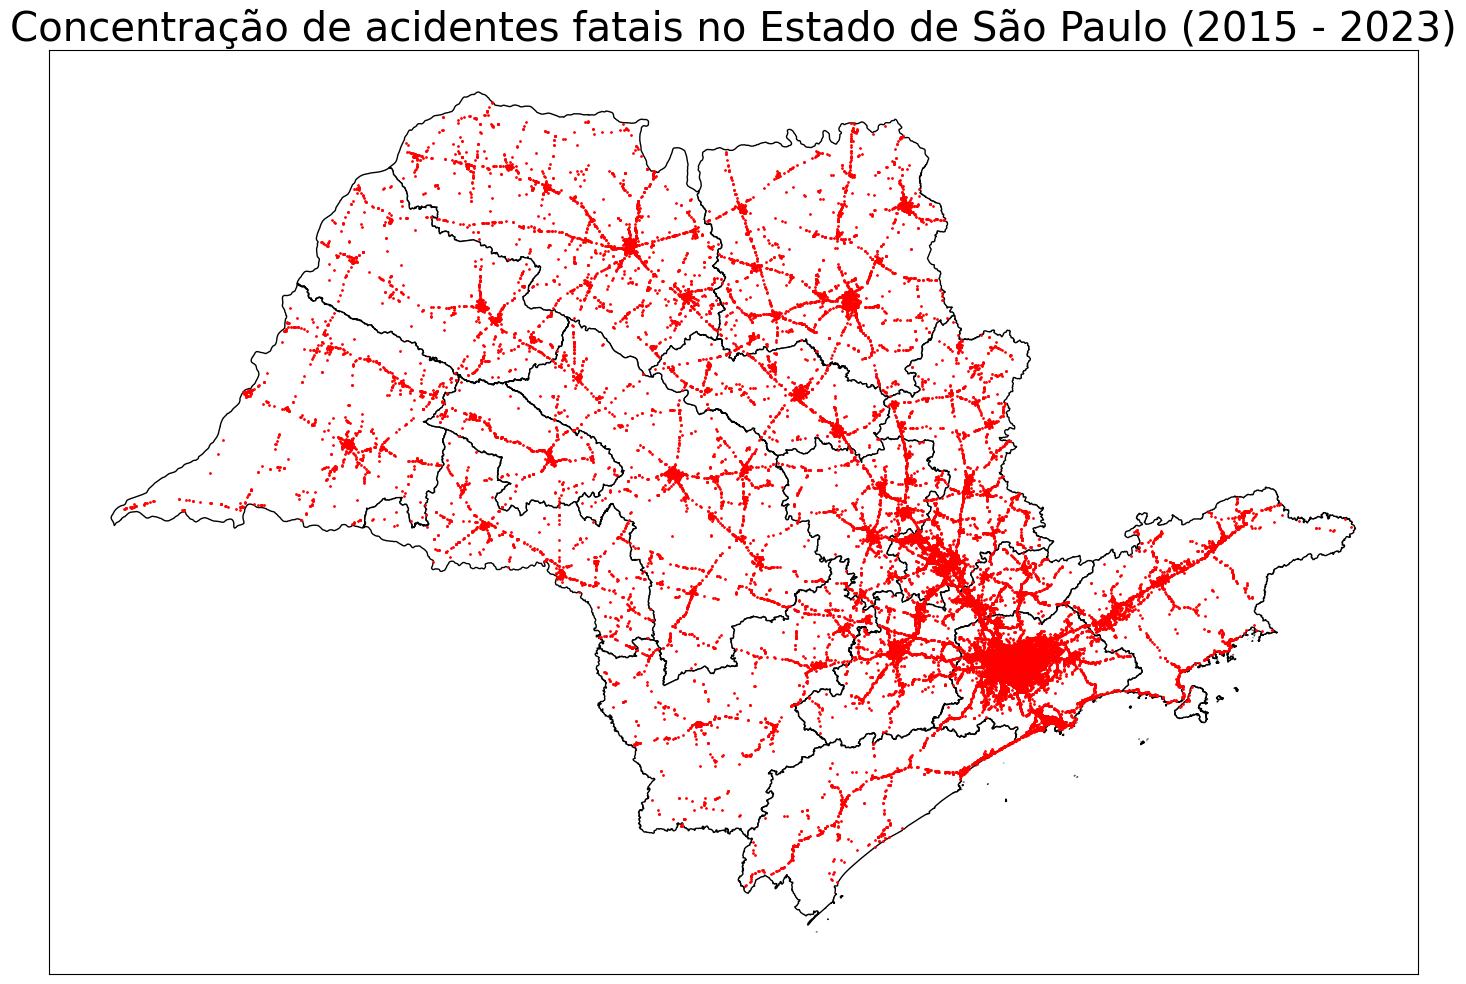

In [ ]:
# Carregar o shapefile do mapa do estado de São Paulo com suas mesorregiões
mapa_sp = gpd.read_file('/content/SP_Mesorregioes_2022.shp')

# Definir limites para as coordenadas geográficas de São Paulo, pontos recolhidos dos extremos no google maps.
# A inversão dos números é para respeitar a convenção matemática de númreos inteiros negativos.
limite_lat_min = -25.310
limite_lat_max = -19.80
limite_long_min = -53.5
limite_long_max = -44.192

# Filtrar os acidentes dentro dos limites de São Paulo
acidentes_sp = df[(df['LAT_(GEO)'] >= limite_lat_min) &
                  (df['LAT_(GEO)'] <= limite_lat_max) &
                  (df['LONG_(GEO)'] >= limite_long_min) &
                  (df['LONG_(GEO)'] <= limite_long_max)]

# Criar o plot
fig, ax = plt.subplots(figsize=(20, 12))

# Plotar o mapa do estado de São Paulo com suas mesorregiões
mapa_sp.plot(ax=ax, color='white', edgecolor='black')

# Plotar os pontos dos acidentes dentro de São Paulo
ax.scatter(acidentes_sp['LONG_(GEO)'], acidentes_sp['LAT_(GEO)'], s=1, c='red')

plt.title('Concentração de acidentes fatais no Estado de São Paulo (2015 - 2023)', fontsize=29)
plt.xticks([])
plt.yticks([])
plt.show()


In [ ]:
# Municípios com maiores incidência.
df['Município'].value_counts().head(3)

Município
SAO PAULO    5916
CAMPINAS      921
GUARULHOS     795
Name: count, dtype: int64

In [ ]:
# Municípios com maiores incidência em porcentagem.
df['Município'].value_counts(normalize= True).head(3)

Município
SAO PAULO    0.170436
CAMPINAS     0.026533
GUARULHOS    0.022903
Name: proportion, dtype: float64

#### 2.   Qual tipo de via ocorre o maior número de acidentes ?

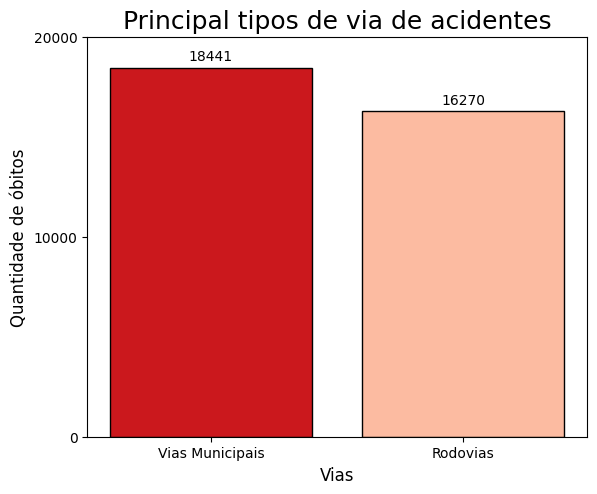

In [ ]:
# Contando o número de registros por tipo de via.
tipos_de_via = df['Tipo de via'].value_counts()

# Criando o gráfico.
fig = plt.figure(figsize= (5,4))

# Criando os eixos.
eixo = fig.add_axes([0, 0, 1, 1])

# Criando uma lista de cores personalizadas.
cores = ['#CB181D','#FCBBA1']

# Alimentando com os dados e adicionando a lista de cores
barras = eixo.bar(tipos_de_via.index, tipos_de_via.values, color=cores, edgecolor='black')

# Adicionando os valores máximos dentro de cada barra
for barra in barras:
    altura = barra.get_height()
    eixo.annotate(f'{int(altura)}', xy=(barra.get_x() + barra.get_width() / 2, altura),
                  xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Configurações do gráfico
eixo.set_title('Principal tipos de via de acidentes', fontsize=18)
eixo.set_xlabel('Vias', fontsize=12)
eixo.set_ylabel('Quantidade de óbitos', fontsize=12)

# Configurando os limites do eixo y
eixo.set_ylim(0, 20000)
eixo.set_yticks([0, 10000, 20000])

plt.show()

In [ ]:
# Valores de acidentes por tipo de via em porcentagem.
tipos_de_via = df['Tipo de via'].value_counts(normalize = True)
tipos_de_via

Tipo de via
Vias Municipais    0.531273
Rodovias           0.468727
Name: proportion, dtype: float64

####3.   Quais são os principais fatores associados a acidentes fatais envolvendo mais de um veículo? Há algum padrão nos tipos de veículos envolvidos nesses casos?

In [ ]:
# Valores por tipo de acidente em porcentagem.
porcentagem_por_tipo = df['Tipo de acidente'].value_counts(normalize= True)
porcentagem_por_tipo

Tipo de acidente
COLISAO          0.610268
ATROPELAMENTO    0.256835
OUTROS           0.132897
Name: proportion, dtype: float64

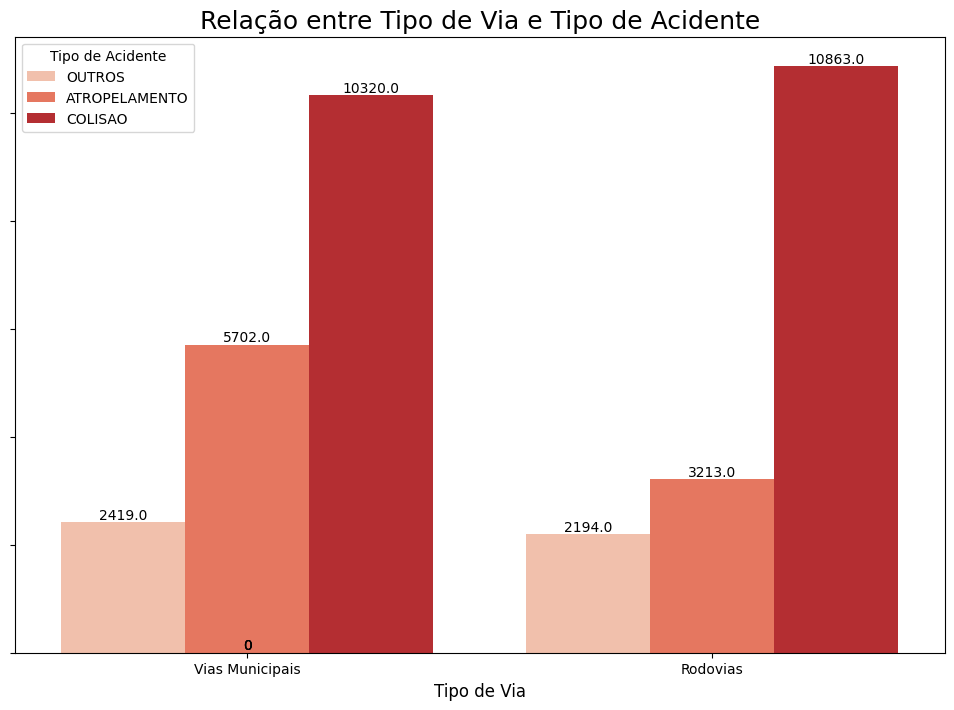

In [ ]:
# Plotando o gráfico de relação entre tipo de via e tipo de acidente.
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Tipo de via', hue='Tipo de acidente', palette='Reds')

# Adicionando os valores acima das barras.
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Ocultar o eixo y.
plt.ylabel('')
ax.set_yticklabels([])

# Cinfugração do Título e eixo x.
plt.title('Relação entre Tipo de Via e Tipo de Acidente', fontsize=18)
plt.xlabel('Tipo de Via', fontsize=12)
plt.legend(title='Tipo de Acidente')

plt.show()



In [ ]:
# Função para plotar o gráfico de barras horizontais
def plotar_grafico(tipo_via):
    # Filtrar os dados pelo tipo de via selecionado
    dados_filtrados = df[df['Tipo de via'] == tipo_via]

    # Contar o número de ocorrências para cada tipo de veículo da vítima
    contagem_veiculos = dados_filtrados['Tipo do veículo da vítima'].value_counts().head(10)

    # Identificar o maior valor de contagem
    max_contagem = contagem_veiculos.max()

    # Plotar o gráfico de barras horizontais
    plt.figure(figsize=(10, 6))

    # Plotar as barras
    for i, (veiculo, contagem) in enumerate(contagem_veiculos.items()):
        if contagem == max_contagem:
            plt.barh(veiculo, contagem, color='red')
        else:
            plt.barh(veiculo, contagem, color='lightgrey')

    # Configurações do gráfico
    plt.title(f'Principais Veículos Envolvidos em Acidentes Fatais - {tipo_via}', fontsize=16)
    plt.xlabel('Número de Ocorrências', fontsize=12)
    plt.ylabel('Tipo de Veículo da Vítima', fontsize=12)
    plt.gca().invert_yaxis()  # Inverter o eixo y para exibir o maior valor no topo

    # Mostrar o gráfico
    plt.show()

# Criar um dropdown para selecionar o tipo de via
tipo_via_widget = widgets.Dropdown(options=df['Tipo de via'].unique(), description='Tipo de Via:')

# Criar a interação
interact(plotar_grafico, tipo_via=tipo_via_widget);


interactive(children=(Dropdown(description='Tipo de Via:', options=('Vias Municipais', 'Rodovias'), value='Via…

#### 4.    Quais são os dias da semana com maior incidência de acidentes fatais?

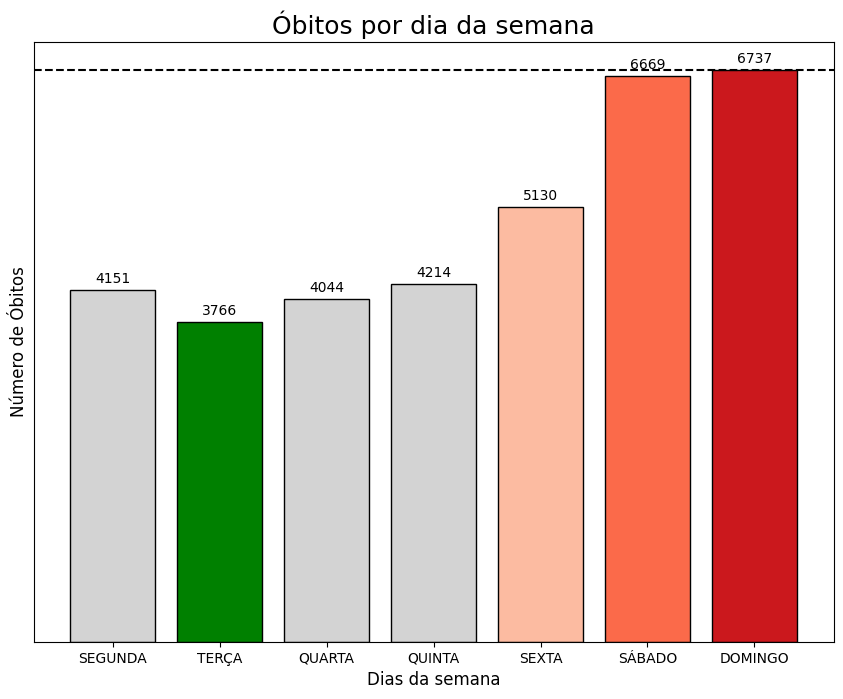

In [ ]:
# Criando uma lista para organizar os dias da semana.
nome_dias =['SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', 'SEXTA', 'SÁBADO','DOMINGO']

# Atribuindo o filtro criado.
obitos_dias_semana = df['Dia da Semana'].value_counts()[nome_dias]

# Criando o gráfico.
fig = plt.figure(figsize= (8,6))

# Criando os eixos.
eixo = fig.add_axes([0, 0, 1, 1])

# Lista para o eixo X com os dias da semana.
indice = range(len(obitos_dias_semana))

# Criando uma lista de cores personalizadas.
cores = ['lightgrey','green','lightgrey','lightgrey','#FCBBA1','#FB6A4A','#CB181D']

# Alimentando com os dados e adicionando a lista de cores
barras = eixo.bar(indice, obitos_dias_semana, color = cores, edgecolor = 'black')

# Adicionando os valores máximos dentro de cada barra
for barra in barras:
    altura = barra.get_height()
    eixo.annotate(f'{int(altura)}', xy=(barra.get_x() + barra.get_width() / 2, altura),
                  xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Configurações do gráfico
eixo.set_title('Óbitos por dia da semana', fontsize= 18)
eixo.set_xlabel('Dias da semana', fontsize = 12)
eixo.set_ylabel('Número de Óbitos', fontsize =12)

# Adicionando a legenda em string para os dias da semana.
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias)

# Configurando os limites do eixo y
eixo.set_ylim()
eixo.set_yticks([])
eixo.axhline(max(obitos_dias_semana), color = 'black', ls = '--')


In [ ]:
# Porcentagem dos óbitos no final de semana.
obitos_dias_semana = df['Dia da Semana'].value_counts(normalize = True)
obitos_dias_semana.head(3).sum()

0.5340093918354413

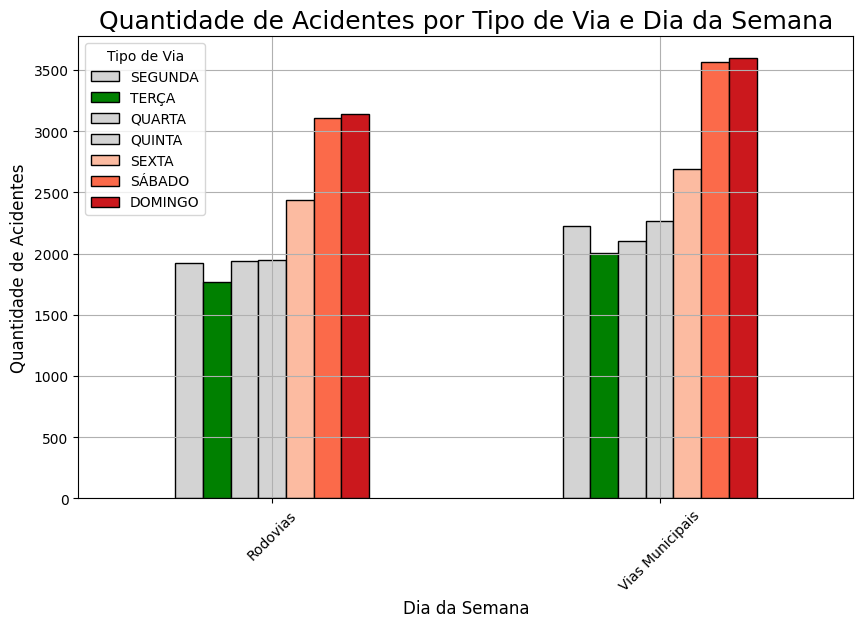

In [ ]:
# Agrupando os dados por tipo de via e dias da semana e contando o número de ocorrências
acidentes_por_via_dia_semana = df.groupby(['Tipo de via', 'Dia da Semana']).size().unstack(fill_value=0)[nome_dias]

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
acidentes_por_via_dia_semana.plot(kind='bar', ax=ax, color = cores, edgecolor = 'black')

# Configurações do gráfico
plt.title('Quantidade de Acidentes por Tipo de Via e Dia da Semana', fontsize=18)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Quantidade de Acidentes', fontsize=12)
plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para facilitar a leitura

plt.legend(title='Tipo de Via')  # Adicionando legenda com título

# adicionando uma grade métrica.
ax.grid(True)
plt.show()


####5.   Existe algum padrão horário nos acidentes fatais? Os horários de pico de acidentes coincidem com horários de maior movimento nas rodovias?

<ipython-input-68-80bc7489af74>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


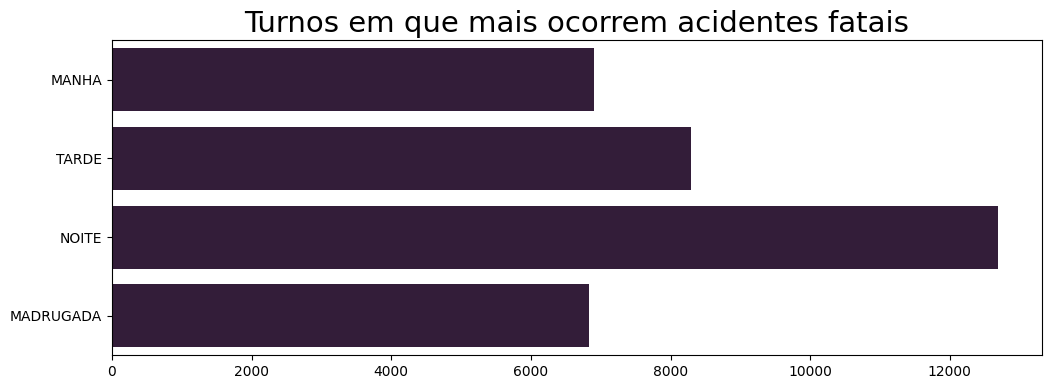

In [ ]:
# Porcentagem de morte por turno e dia da semana
porcentagem_turno = df['Turno'].value_counts() / df['Turno'].value_counts().sum() * 100

fig, axs = plt.subplots(figsize=(12, 9))

# Plot para os turnos
plt.subplot(2, 1, 2)
plt.xlabel('', fontsize=1)
plt.ylabel('', fontsize=1)
sns.countplot(df['Turno'], order=['MANHA', 'TARDE', 'NOITE', 'MADRUGADA'])

# Configurações para os turnos
plt.title('Turnos em que mais ocorrem acidentes fatais', fontsize=21)
plt.xlabel('', fontsize=1)
plt.ylabel('', fontsize=1)
plt.show()


In [ ]:
porcentagem_turno

Turno
NOITE        36.547492
TARDE        23.903085
MANHA        19.878425
MADRUGADA    19.670998
Name: count, dtype: float64

In [ ]:
# Definir a paleta de cores.
sns.set_palette("rocket")

# Mapeamento dos dias da semana
dias_semana_map = {0: 'SEGUNDA', 1: 'TERÇA', 2: 'QUARTA', 3: 'QUINTA', 4: 'SEXTA', 5: 'SÁBADO', 6: 'DOMINGO'}

# Função para plotar a distribuição de acidentes por dia da semana
def plotar_distribuicao_acidentes_por_dia(dia_semana, mes, ano):
    # Filtrar os dados pelo dia da semana, mês e ano selecionados
    dados_filtrados = df[(df['Dia da Semana'] == dia_semana) &
                         (df['Data do Acidente'].dt.month == mes) &
                         (df['Ano do BO (RDO)'] == ano)]

    # Criar uma figura para o gráfico
    plt.figure(figsize=(12, 8))
    # Plotar a distribuição de acidentes
    sns.histplot(dados_filtrados['Hora do Acidente'], kde=True, bins=24)

    # Configurações do gráfico
    plt.title(f'Distribuição de Acidentes por Hora - {dia_semana} ({mes}/{ano})', fontsize=18)
    plt.xlabel('Hora do Dia', fontsize=12)
    plt.ylabel('Número de Acidentes', fontsize=12)

    # Definindo os limites do eixo x
    plt.xlim(0, 23)
    plt.xticks(range(0, 24))

    # Definindo os limites do eixo y
    max_acidentes_por_hora = dados_filtrados['Hora do Acidente'].value_counts().max()
    limite_y_superior = max_acidentes_por_hora + 1
    plt.ylim(0, limite_y_superior)
    plt.yticks(range(0, limite_y_superior + 1))

    # Mostrar o gráfico
    plt.show()

# Criar widgets para selecionar o dia da semana, mês e ano
dia_semana_widget = widgets.Dropdown(options=dias_semana_map.values(), description='Dia da Semana:')
mes_widget = widgets.Dropdown(options=range(1, 13), description='Mês:')
ano_widget = widgets.Dropdown(options=df['Ano do BO (RDO)'].unique(), description='Ano:')

# Criar a interação
interact(plotar_distribuicao_acidentes_por_dia, dia_semana=dia_semana_widget, mes=mes_widget, ano=ano_widget);


interactive(children=(Dropdown(description='Dia da Semana:', options=('SEGUNDA', 'TERÇA', 'QUARTA', 'QUINTA', …

In [ ]:
# Horários com os maiores índices de acidentes.
df['Hora do Acidente'].value_counts().head(3)

Hora do Acidente
19.0    2671
18.0    2595
20.0    2285
Name: count, dtype: int64

In [ ]:
# Porcentagem de acidentes no pico.
df['Hora do Acidente'].value_counts(normalize= True).head(3).sum()

0.21753910863991244

####6.   Qual é a tendência geral de acidentes fatais ao longo dos anos? Houve alguma mudança significativa ao longo do período analisado?

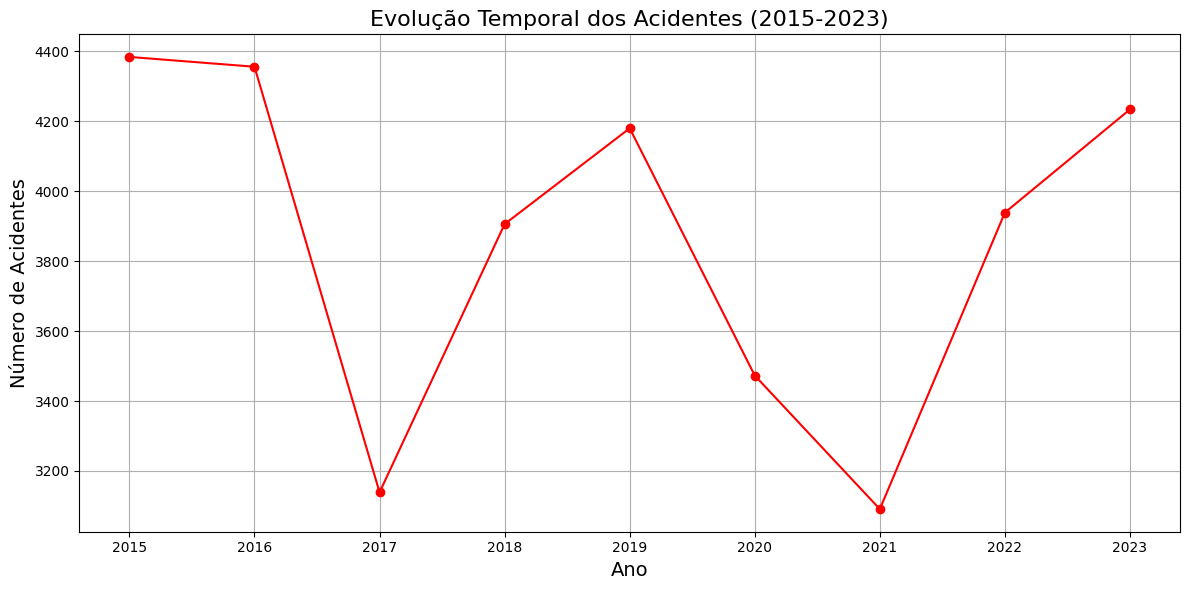

In [ ]:
# Filtrar os dados para incluir apenas os anos entre 2015 e 2023
df_filtrado = df[(df['Data do Acidente'].dt.year >= 2015) & (df['Data do Acidente'].dt.year <= 2023)]

# Agrupar os dados filtrados por ano e contar o número de acidentes em cada ano
acidentes_por_ano = df_filtrado.groupby(df_filtrado['Data do Acidente'].dt.year)['Número do Bo (RDO)'].count()

# Criar o gráfico de evolução temporal dos acidentes
plt.figure(figsize=(12, 6))
acidentes_por_ano.plot(marker='o', color='red', linestyle='-')
plt.title('Evolução Temporal dos Acidentes (2015-2023)', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Acidentes', fontsize=14)
plt.grid(True)
plt.xticks(acidentes_por_ano.index)  # Definir os anos como os rótulos do eixo x
plt.tight_layout()
plt.show()



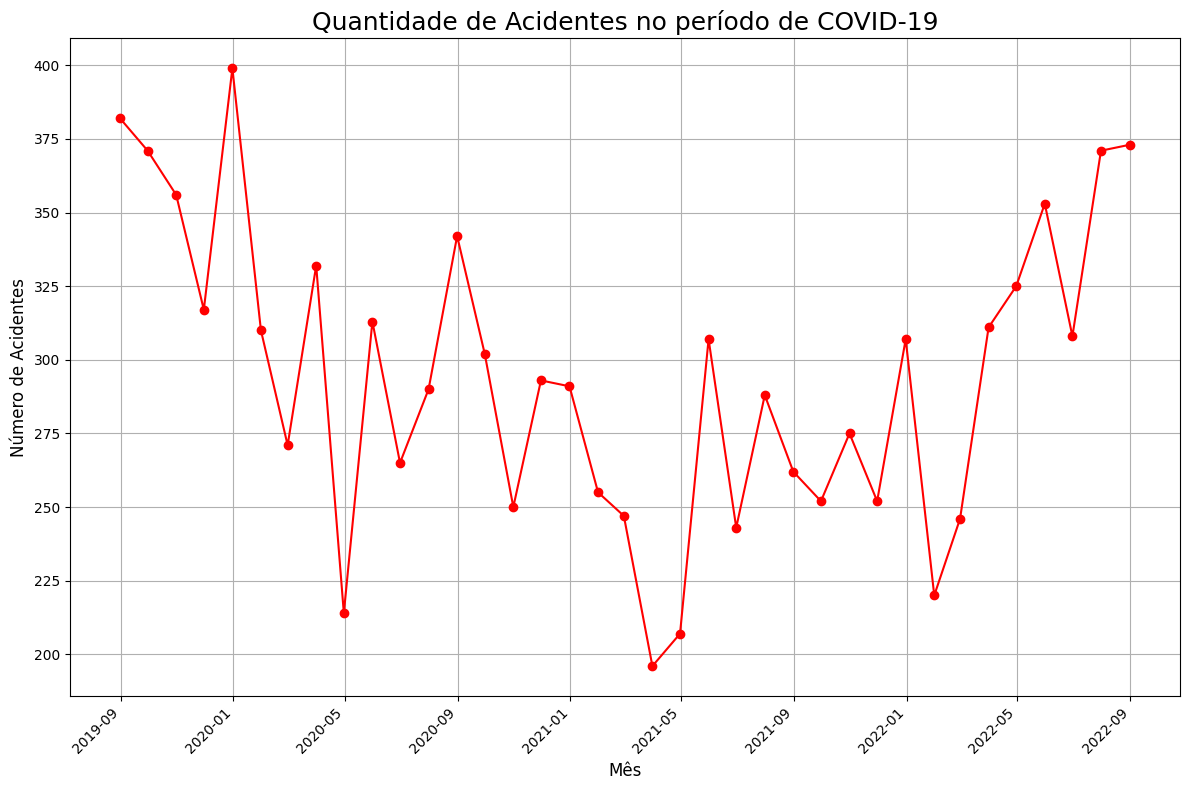

In [ ]:
# Filtro de dados para o período desejado
dados_por_ano = df[(df['Data do Acidente'] >= '2019-08-01') & (df['Data do Acidente'] <= '2022-08-30')]

# Agrupamento por mês e contagem de ocorrências
acidentes_por_mes = dados_por_ano.groupby(pd.Grouper(key='Data do Acidente', freq='M')).size()

# Criação do gráfico de linha
plt.figure(figsize=(12, 8))
plt.plot(acidentes_por_mes.index, acidentes_por_mes.values, marker='o', color='red', linestyle='-')

# Configurações do gráfico
plt.title('Quantidade de Acidentes no período de COVID-19', fontsize=18)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Acidentes', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


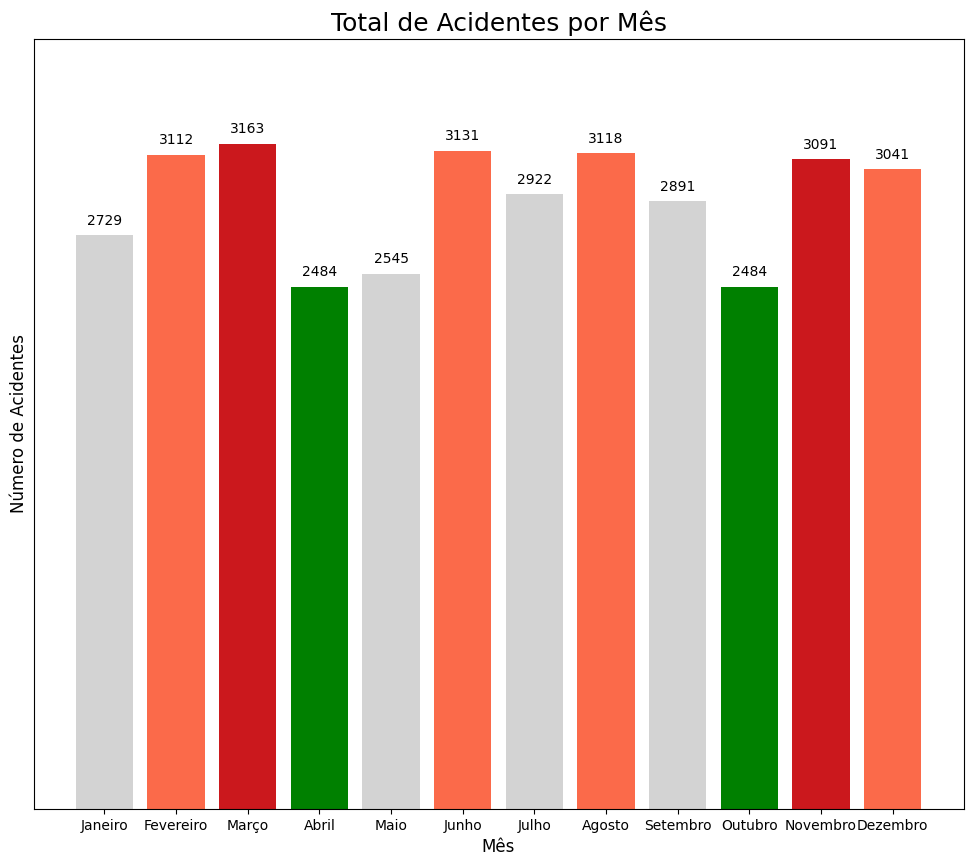

In [ ]:
# Mapeamento dos meses
meses_map = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7: 'Julho',
              8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

# Extrair os meses do DataFrame e ordenar pelos meses corretamente
df['Mês do Acidente'] = df['Data do Acidente'].dt.month.map(meses_map)
total_acidentes_por_mes = df['Mês do Acidente'].value_counts().sort_index()

# Especificar a ordem dos meses
ordem_meses = list(meses_map.values())

# Criar uma figura para o gráfico
plt.figure(figsize=(12, 10))

# Filtro de cores

cores2= ['lightgrey','#CB181D','#CB181D','green','lightgrey','#CB181D','lightgrey','#CB181D','lightgrey','green','#FB6A4A','#FB6A4A',]

# Plotar o total de acidentes por mês
barplot = plt.bar(ordem_meses, total_acidentes_por_mes, color = cores2)

# Adicionar os valores acima de cada barra
for i, valor in enumerate(total_acidentes_por_mes):
    plt.text(i, valor + 50, str(valor), ha='center', fontsize=10)

# Configurações do gráfico
plt.title('Total de Acidentes por Mês', fontsize=18)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Acidentes', fontsize=12)

# Definindo os limites do eixo y
max_acidentes_por_mes = total_acidentes_por_mes.max()
plt.ylim(0, max_acidentes_por_mes + 500)
plt.yticks([])
# Mostrar o gráfico
plt.show()


### Questões de natureza social: Foi abordada nesta etapa análises relacionada ao perfil das vítimas, como idade, genero, caracteristicas.

####7. Qual é o tipo mais comum de vítima na hora do acidente?

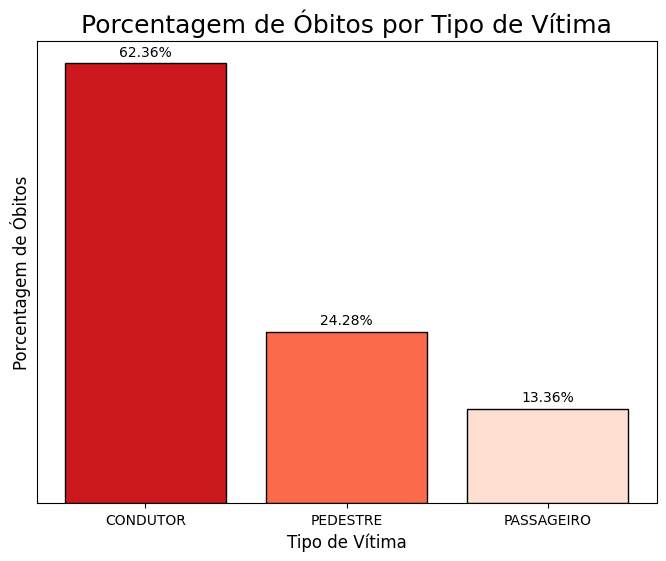

In [ ]:
# Porcentagem de cada tipo de vítima
porcentagens = df['Tipo de vítima'].value_counts(normalize=True) * 100

# Criando o gráfico de barras
fig = plt.figure(figsize=(8, 6))
cores = ['#CB181D', '#FB6A4A', '#FEE0D2']
barras = plt.bar(porcentagens.index, porcentagens.values, color=cores, edgecolor='black')

# Adicionando rótulos para as barras
for barra in barras:
    altura = barra.get_height()
    plt.annotate(f'{altura:.2f}%', xy=(barra.get_x() + barra.get_width() / 2, altura),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Configurações do gráfico
plt.title('Porcentagem de Óbitos por Tipo de Vítima', fontsize=18)
plt.xlabel('Tipo de Vítima', fontsize=12)
plt.ylabel('Porcentagem de Óbitos', fontsize=12)

# Remover informações do eixo y
plt.yticks([])

plt.show()



####8. O tipo de vítima é o mesmo para cada tipo de via ?

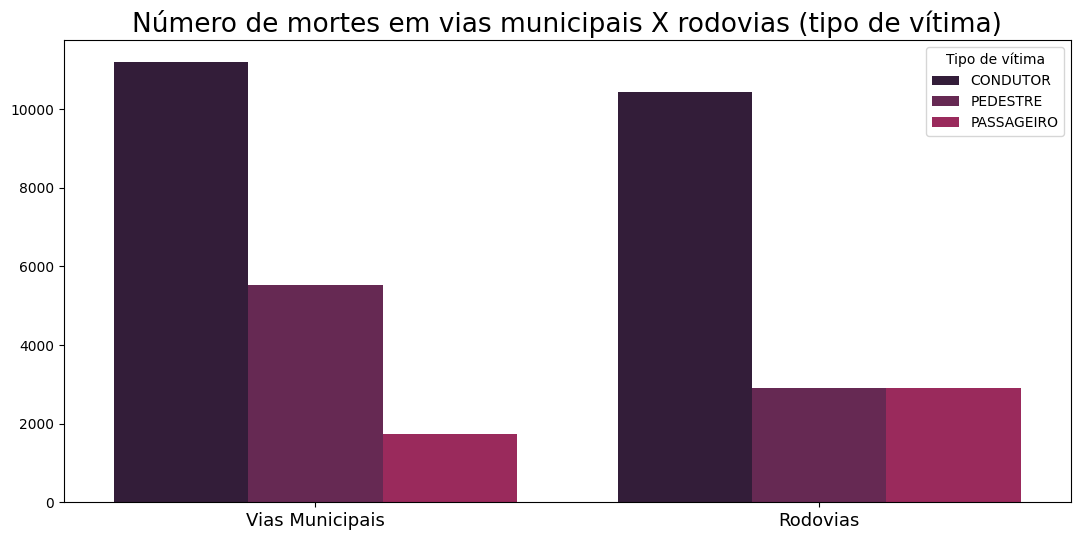

In [ ]:
# Criar a figura
fig = plt.figure(figsize=(13, 6))

# Plotar o countplot
sns.countplot(x=df['Tipo de via'], hue=df['Tipo de vítima'])

# Ajustes visuais
plt.xlim(-0.5, 1.5)
plt.xlabel('', fontsize=13)
plt.ylabel('')
plt.xticks(fontsize=13)
plt.title('Número de mortes em vias municipais X rodovias (tipo de vítima)', fontsize=19)
plt.legend(title='Tipo de vítima', loc='upper right',)

plt.show()

####9. Qual é o tipo de vítima predominante?

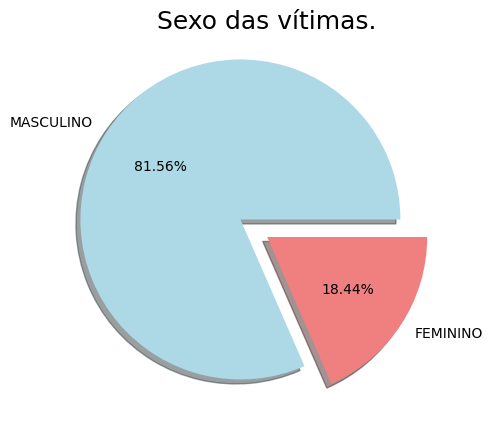

In [ ]:
# Porcentagem de cada tipo de vítima
porcentagens = df['Sexo'].value_counts(normalize=True) * 100

# Criando gráfico
fig = plt.figure(figsize=(5,4))

# Tamanho eixo principal
eixo = fig.add_axes([0, 0, 1, 1])

# Explodindo os finais de semana, crie uma  variável onde float é explodir e 0 não.
explodir = [0.2, 0]

# Escolhendo o gráfico
eixo.pie(porcentagens, labels=porcentagens.index, explode=explodir, shadow=True,
         autopct='%.2f%%', colors=['lightblue', 'lightcoral'])

# Configurações
eixo.set_title('Sexo das vítimas.', fontsize=18)

plt.show()


####10. As vítimas apresentam características em comum?

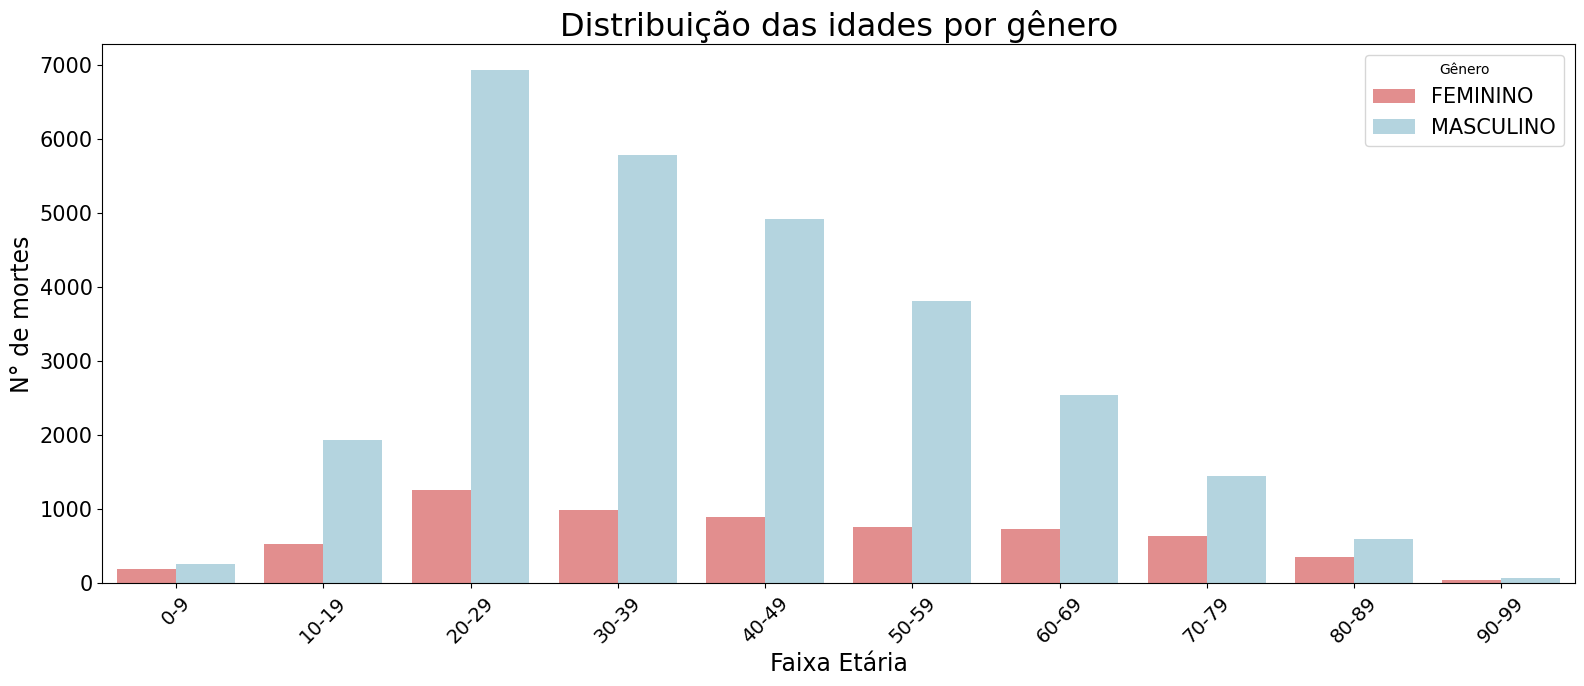

In [ ]:
# Criando faixas etárias
faixas_etarias = np.arange(0, df['Idade da vítima'].max() + 10, 10)
labels_faixas = [f'{i}-{i+9}' for i in faixas_etarias[:-1]]  # Cria rótulos para as faixas etárias

# Adicionando coluna de faixa etária ao DataFrame
df['Faixa Etária'] = pd.cut(df['Idade da vítima'], bins=faixas_etarias, labels=labels_faixas, right=False)

# Criando o gráfico
plt.figure(figsize=(19, 7))
sns.countplot(x='Faixa Etária', hue='Sexo', data=df, palette=['#F08080', '#ADD8E6'])

# Ajustes visuais
plt.xlabel('Faixa Etária', fontsize=17)
plt.ylabel('N° de mortes', fontsize=17)
plt.title('Distribuição das idades por gênero', fontsize=23)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=15)
plt.legend(title='Gênero', fontsize=15)

plt.show()


####11. Existem correlações entre os tipos de vítima?

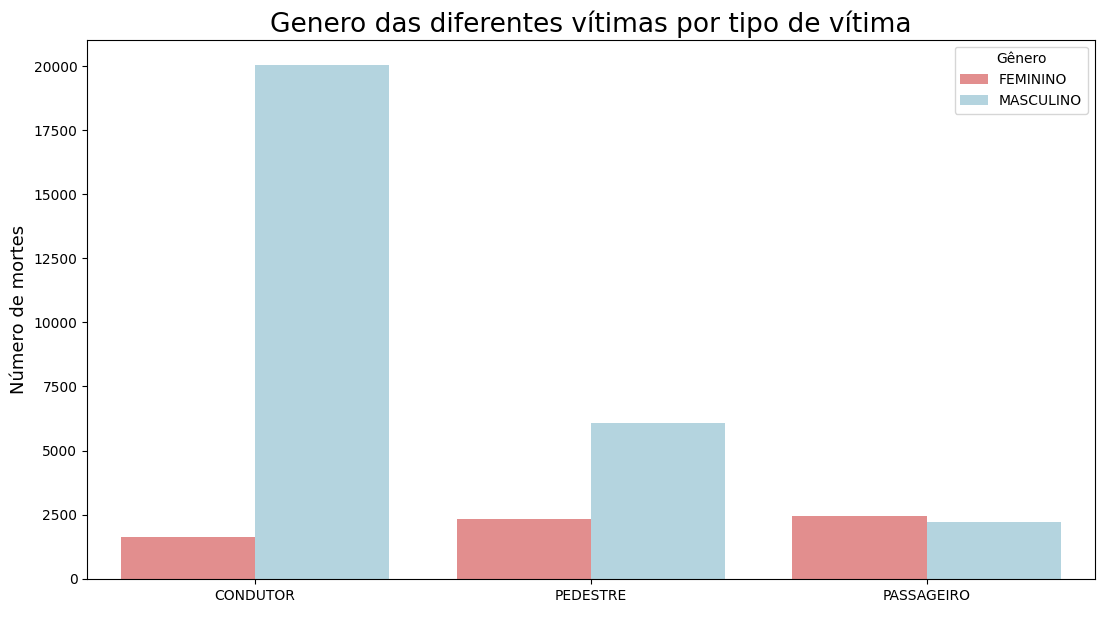

In [ ]:
# Criar a figura
fig = plt.figure(figsize=(13, 7))

# Plotar o countplot
sns.countplot(x=df['Tipo de vítima'], hue=df['Sexo'], palette=['#F08080', '#ADD8E6'])

# Ajustes visuais
plt.xlabel(' ', fontsize=13)
plt.xlim(-0.5, 2.5)
plt.legend(title='Gênero')
plt.ylabel('Número de mortes', fontsize=13)
plt.title('Genero das diferentes vítimas por tipo de vítima', fontsize=19)

plt.show()

### Conclusão

Os insights obtidos a partir da análise dos dados de acidentes no estado de São Paulo entre 2015 e 2023 revelam um cenário complexo e preocupante. O número de acidentes fatais é significativo e reflete um problema crônico que afeta não apenas as vítimas diretas, mas também suas famílias e a sociedade como um todo.

Os dados indicam que:

* Os homens representaram 81,6% das mortes;

* A faixa etária predominante dos envolvidos é de 20 a 29 anos;

* Os condutores corresponderam a 62,36% dos óbitos. Um ponto notável é que entre as vítimas passageiras (13,36%), as mulheres são a maioria;

* No intervalo de tempo considerado, o ano de 2015 apresentou o maior número de acidentes fatais;

* Os anos de 2020 e 2021 apresentaram uma queda no número de acidentes devido ao período de quarentena da COVID-19;

* O mês de março apresentou o maior número de acidentes fatais;

* O período entre abril e maio apresentou o menor número de acidentes, possivelmente por influência de campanhas de conscientização, como o Maio Amarelo;

* Ocorreram mais mortes diárias nos finais de semana do que nos dias de semana, sendo que sexta-feira, sábado e domingo somam 53,4% dos acidentes;

* Terça-feira é o dia da semana com o menor índice de acidentes nos últimos 8 anos;

* A noite se mostrou mais perigosa que os outros turnos do dia (36,5% das mortes ocorreram à noite);

* O horário que concentra o maior número de acidentes é às 19h, sendo o período do "rush", entre 18h e 20h, responsável por 22% dos óbitos;

* O tipo mais comum desses acidentes (61%) foi colisão, seguido por atropelamento (25,7%);

* Os veículos envolvidos em acidentes variam de acordo com a via: nos municípios, as motocicletas e pedestres são a maioria dos envolvidos em acidentes fatais, enquanto em rodovias são os automóveis, seguidos por motocicletas;

* As vias municipais concentram mais acidentes fatais em relação às rodovias;

* O município com mais mortes é a capital, com cerca de 5916 mortes nesse período de 8 anos, correspondendo a 17% do total.

A predominância de homens jovens, na faixa etária de 20 a 29 anos, como as principais vítimas, sugere a necessidade de intervenções direcionadas para conscientização e educação no trânsito, visando modificar comportamentos de risco nesse grupo específico. Além disso, o fato de os condutores representarem a maioria das vítimas ressalta a importância de políticas públicas que promovam a segurança viária, como campanhas de educação e fiscalização mais eficazes.

A queda no número de acidentes durante os anos de 2020 e 2021, atribuída em parte às restrições devido à pandemia de COVID-19, destaca a influência significativa de fatores externos na ocorrência de acidentes. Isso ressalta a importância de políticas de saúde pública e medidas de prevenção para reduzir os índices de acidentes.

Os padrões identificados em relação aos dias da semana, turnos e horários de ocorrência dos acidentes fornecem insights valiosos para o planejamento e implementação de estratégias de prevenção. A concentração de acidentes nos finais de semana e à noite indica áreas prioritárias para intervenção, como aumento da fiscalização e conscientização em horários e locais específicos.

Por fim, a distribuição dos tipos de acidentes e veículos envolvidos destaca a necessidade de melhorias na infraestrutura viária e no comportamento dos usuários, visando reduzir colisões e atropelamentos, que são os tipos mais comuns de acidentes

